In [1]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Create a dataframe of data
df = pd.read_csv('../data/rosetta-ann_formatted.csv', header=None, skiprows=None, \
                 low_memory=False)

In [3]:
# Check that column names were importted due to special characters in titles
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64')

In [4]:
# Generate first view of data
df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,Code,USDA soil texture,% - Sand,% - Silt,% - Clay,Sand_Clay,g/cm3 - BD,cm3/cm3 - Theta_r,cm3/cm3 - Theta_s,(1/cm) - Alpha,...,Log - Log(N),Log(cm/day) - Log(Ks),Log(cm/day) - Log(Ko),cm3/cm3 - Theta_r_u,cm3/cm3 - Theta_s_u,log(1/cm) - Log(Alpha_u),Log - Log(N_u),Log(cm/day) - Log(Ks_u),Log(cm/day) - Log(Ko_u),(-) - L_u
1,1,clay,1,1,98,NaN,1,0.13078,0.62223,0.03660328,...,0.07275,1.43604,1.14822,0.05916,0.08842,0.6451,0.04592,1.05106,0.39188,2.13295
2,2,clay,2,1,97,NaN,1,0.13018,0.62199,0.036351304,...,0.0731,1.44811,1.1484,0.05792,0.08678,0.63013,0.04554,1.02883,0.39144,2.11782
3,3,clay,3,1,96,NaN,1,0.12959,0.62169,0.036078627,...,0.07347,1.45868,1.14798,0.0567,0.08513,0.61515,0.04517,1.00478,0.39099,2.10211
4,4,clay,4,1,95,NaN,1,0.129,0.62136,0.035791508,...,0.07387,1.46761,1.14708,0.0555,0.08348,0.6002,0.04479,0.97819,0.39051,2.08593


##### This shows:
* First row ("id" = 0) is the unformatted row we want to be the list of columns' titles"

In [5]:
# Create string of column titles that are used to convert columns' titles
cols_unformatted = "Code,USDA soil texture, %Sand, %Silt, %Clay, Sand_Clay, g/cm3_BD, cm3/cm3_Theta_r, " + \
"cm3/cm3_Theta_s, (1/cm)_Alpha, (-)_N, (cm d-1)_Ks, (-)_L, log(1/cm)_Log(Alpha), " + \
"Log_Log(N), Log(cm/day)_Log(Ks), Log(cm/day)_Log(Ko), cm3/cm3_Theta_r_u, cm3/cm3_Theta_s_u, " + \
"log(1/cm)_Log(Alpha_u), Log_Log(N_u), Log(cm/day)_Log(Ks_u), Log(cm/day)_Log(Ko_u), (-)_L_u"

In [6]:
# Removes unwanted formatting and sets column titles of dataframe
df.columns = [i.replace(' ','') for i in cols_unformatted.split(',')]
# Drop first row of data not containing data
df = df.drop(0, axis=0)

In [7]:
# Checks to see if there are null values
print df.isnull().sum()
print
# Gives concise summary of dataframe
df.info()

Code                          0
USDAsoiltexture               0
%Sand                         0
%Silt                         0
%Clay                         0
Sand_Clay                 31446
g/cm3_BD                      0
cm3/cm3_Theta_r               0
cm3/cm3_Theta_s               0
(1/cm)_Alpha                  0
(-)_N                         0
(cmd-1)_Ks                    0
(-)_L                         0
log(1/cm)_Log(Alpha)          0
Log_Log(N)                    0
Log(cm/day)_Log(Ks)           0
Log(cm/day)_Log(Ko)           0
cm3/cm3_Theta_r_u             0
cm3/cm3_Theta_s_u             0
log(1/cm)_Log(Alpha_u)        0
Log_Log(N_u)                  0
Log(cm/day)_Log(Ks_u)         0
Log(cm/day)_Log(Ko_u)         0
(-)_L_u                       0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47169 entries, 1 to 47169
Data columns (total 24 columns):
Code                      47169 non-null object
USDAsoiltexture           47169 non-null object
%Sand        

##### Missing Values
* There were no errors on the read_csv with datatypes, and the "Sand_Clay" column is the only column that has 31446 NaN values. This indicates that the data hasn't been corrupted. 

##### Concise Summary
* We also note that all the data types are objects. Most of the columns are integers, so data type conversion is necessary. 

In [8]:
# Generates various summary statistics excluding NaN values
df.describe().T

,count,unique,top,freq
Code,47169,5241,1369,9
USDAsoiltexture,47169,28,clay,13932
%Sand,47169,99,1,918
%Silt,47169,100,2,2646
%Clay,47169,100,1,909
Sand_Clay,15723,5045,7_91,9
g/cm3_BD,47169,9,1.8,5241
cm3/cm3_Theta_r,47169,9654,0.07557,20
cm3/cm3_Theta_s,47169,23393,0.39098,13
(1/cm)_Alpha,47169,35707,0.017430506,8


In [9]:
# Generates visible data for the first time
df.head().T

,1,2,3,4,5
Code,1,2,3,4,5
USDAsoiltexture,clay,clay,clay,clay,clay
%Sand,1,2,3,4,5
%Silt,1,1,1,1,1
%Clay,98,97,96,95,94
Sand_Clay,NaN,NaN,NaN,NaN,NaN
g/cm3_BD,1,1,1,1,1
cm3/cm3_Theta_r,0.13078,0.13018,0.12959,0.129,0.12843
cm3/cm3_Theta_s,0.62223,0.62199,0.62169,0.62136,0.62098
(1/cm)_Alpha,0.03660328,0.036351304,0.036078627,0.035791508,0.035494413


##### What these show and what is already known:
* Shows that all feature data types are objects
    * Data type conversion is required before "df.describe" will generate summary statistics 
* Shows the NaN values in the "Sand_Clay" column
    * Since NaN values can be used as a category, we don't need to convert them at this time
* Describe shows us the number of unique categories in the "Sand_Clay" column
* Shows "USDA soil texture" column to be categorical variabels
    * Dummification, clustering or both can be leveraged as methods to deal with cateforical variables
* We already know that "%sand + %silt + %clay = 100" so we only need to use two of the three in a statistical model (the third will be perfectly correlated with the sum of the other two)

##### Transforms the data types of all columns

In [12]:
# Creates list of columns to be converted to floats
float_cols = list(set(df.columns) - {'USDAsoiltexture', 'Sand_Clay'})

In [15]:
# Converts numerical values to float64
df[float_cols] = df[float_cols].astype(float)

In [19]:
# Double checks that datatypes have been converted. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47169 entries, 1 to 47169
Data columns (total 24 columns):
Code                      47169 non-null float64
USDAsoiltexture           47169 non-null object
%Sand                     47169 non-null float64
%Silt                     47169 non-null float64
%Clay                     47169 non-null float64
Sand_Clay                 15723 non-null object
g/cm3_BD                  47169 non-null float64
cm3/cm3_Theta_r           47169 non-null float64
cm3/cm3_Theta_s           47169 non-null float64
(1/cm)_Alpha              47169 non-null float64
(-)_N                     47169 non-null float64
(cmd-1)_Ks                47169 non-null float64
(-)_L                     47169 non-null float64
log(1/cm)_Log(Alpha)      47169 non-null float64
Log_Log(N)                47169 non-null float64
Log(cm/day)_Log(Ks)       47169 non-null float64
Log(cm/day)_Log(Ko)       47169 non-null float64
cm3/cm3_Theta_r_u         47169 non-null float64
cm3/cm3_The

In [21]:
# Generates various summary statistics excluding categorical features and NaN values
df.describe().T
# NOTE: Disregaurd "Code" becuase it is the index column

,count,mean,std,min,25%,50%,75%,max
Code,47169.0,2621.000000,1512.962391,1.000000,1311.000000,2621.000000,3931.000000,5241.000000
%Sand,47169.0,34.590155,24.033311,1.000000,14.000000,30.000000,52.000000,99.000000
%Silt,47169.0,31.798703,23.912349,0.000000,11.000000,28.000000,49.000000,99.000000
%Clay,47169.0,33.611143,24.043026,0.000000,13.000000,30.000000,51.000000,99.000000
g/cm3_BD,47169.0,1.400000,0.258202,1.000000,1.200000,1.400000,1.600000,1.800000
cm3/cm3_Theta_r,47169.0,0.075124,0.024918,0.022260,0.054400,0.077020,0.095970,0.131350
cm3/cm3_Theta_s,47169.0,0.439970,0.079883,0.277800,0.375170,0.434080,0.501210,0.626630
(1/cm)_Alpha,47169.0,0.019385,0.010555,0.003535,0.010749,0.018620,0.025798,0.071110
(-)_N,47169.0,1.419306,0.256040,1.134279,1.249741,1.380893,1.518903,4.492003
(cmd-1)_Ks,47169.0,53.798693,97.101356,0.810000,7.560000,22.260000,59.230000,1490.290000


##### What this shows:
* After looking at the IQR, column "(-)_L" could be "unnormally" distributed
    * This could be an indication of...

The rest of the analysis of IQRs, max and mins, standard deviations, and means reveals nothing significant or abnormal. Thus, there are probably no major outliers affecting a particular feature's distribution. 

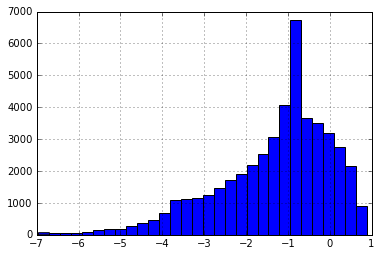

In [25]:
df['(-)_L'].hist(bins=30)

In [23]:
df.to_csv('../data/rosetta-ann_pyformat.csv', sep=',')